In [1]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import src.mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
pca1 = PCA(n_components=100)
pca1.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
train_images_pca1 = pca1.transform(train_set.images)
validation_images_pca1 = pca1.transform(validation_set.images)

In [7]:
train_counter = np.bincount(train_set.labels)
validation_counter = np.bincount(validation_set.labels)
train_images_pca1_sorted = []
validation_images_pca1_sorted = []

for i in range(0, 10):
    local_train_images_pca = np.zeros((train_counter[i], 100))
    local_validation_images_pca = np.zeros((validation_counter[i], 100))
    
    k = 0
    for j in range(0, train_set.images.shape[0]):
        if train_set.labels[j] == i:
            local_train_images_pca[k, :] = train_images_pca1[j]
            k += 1
    
    train_images_pca1_sorted.append(local_train_images_pca)
            
    k = 0
    for j in range(0, validation_set.images.shape[0]):
        if validation_set.labels[j] == i:
            local_validation_images_pca[k, :] = validation_images_pca1[j]
            k += 1
    
    validation_images_pca1_sorted.append(local_validation_images_pca)

In [8]:
gaussian_mixtures = []
for i in range(0, 10):
    gaussian_mixture = GaussianMixture(n_components=20, verbose=2)
    gaussian_mixture.fit(train_images_pca1_sorted[i])
    gaussian_mixtures.append(gaussian_mixture)

Initialization 0
  Iteration 0	 time lapse 0.60137s	 ll change inf
  Iteration 10	 time lapse 2.49293s	 ll change 0.00593
Initialization converged: True	 time lapse 4.12155s	 ll 20.15913
Initialization 0
  Iteration 0	 time lapse 0.61075s	 ll change inf
  Iteration 10	 time lapse 2.64981s	 ll change 0.50370
  Iteration 20	 time lapse 2.85170s	 ll change 0.08657
  Iteration 30	 time lapse 2.98435s	 ll change 0.01230
  Iteration 40	 time lapse 2.89259s	 ll change 0.00259
Initialization converged: True	 time lapse 12.30935s	 ll 201.94993
Initialization 0
  Iteration 0	 time lapse 0.62109s	 ll change inf
  Iteration 10	 time lapse 3.02068s	 ll change 0.02331
Initialization converged: True	 time lapse 4.32296s	 ll 0.73876
Initialization 0
  Iteration 0	 time lapse 0.61034s	 ll change inf
  Iteration 10	 time lapse 3.12268s	 ll change 0.04685
  Iteration 20	 time lapse 3.08938s	 ll change 0.01568
Initialization converged: True	 time lapse 8.79092s	 ll 5.57305
Initialization 0
  Iteration 0	 

In [9]:
train_scores = []
for i in range(0, 10):
    train_scores.append(gaussian_mixtures[i].score_samples(train_images_pca1))

In [10]:
validation_scores = []
for i in range(0, 10):
    validation_scores.append(gaussian_mixtures[i].score_samples(validation_images_pca1))

In [11]:
train_labels_predictions_log_probas = []
for i in range(0, train_images_pca1.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[j][i])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_log_probas.append([train_set.labels[i], predicted_class, max(scores)])

In [12]:
validation_labels_predictions_log_probas = []
for i in range(0, validation_images_pca1.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(validation_scores[j][i])
    predicted_class = scores.index(max(scores))
    validation_labels_predictions_log_probas.append([validation_set.labels[i], predicted_class, max(scores)])

In [13]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, log_proba in train_labels_predictions_log_probas:
    if label != prediction:
        train_false_positive_scores.append(log_proba)
    else:
        train_true_positive_scores.append(log_proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)

In [14]:
validation_false_positive_scores = []
validation_true_positive_scores = []
for label, prediction, log_proba in validation_labels_predictions_log_probas:
    if label != prediction:
        validation_false_positive_scores.append(log_proba)
    else:
        validation_true_positive_scores.append(log_proba)
validation_false_positive_scores = sorted(validation_false_positive_scores)
validation_true_positive_scores = sorted(validation_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


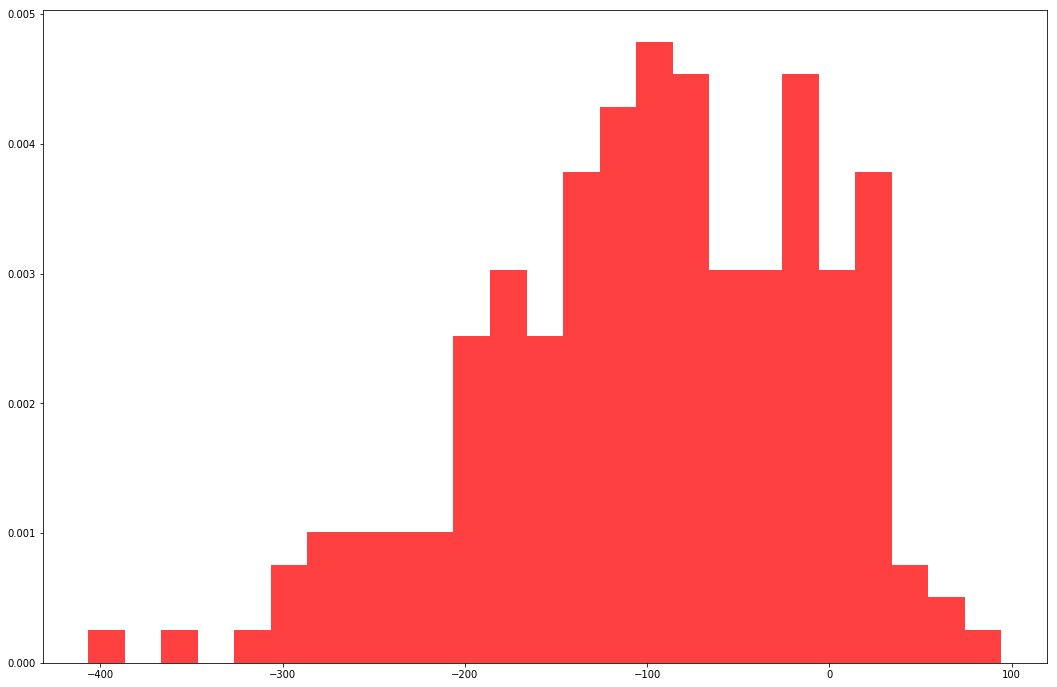

In [15]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_false_positive_scores, 25, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


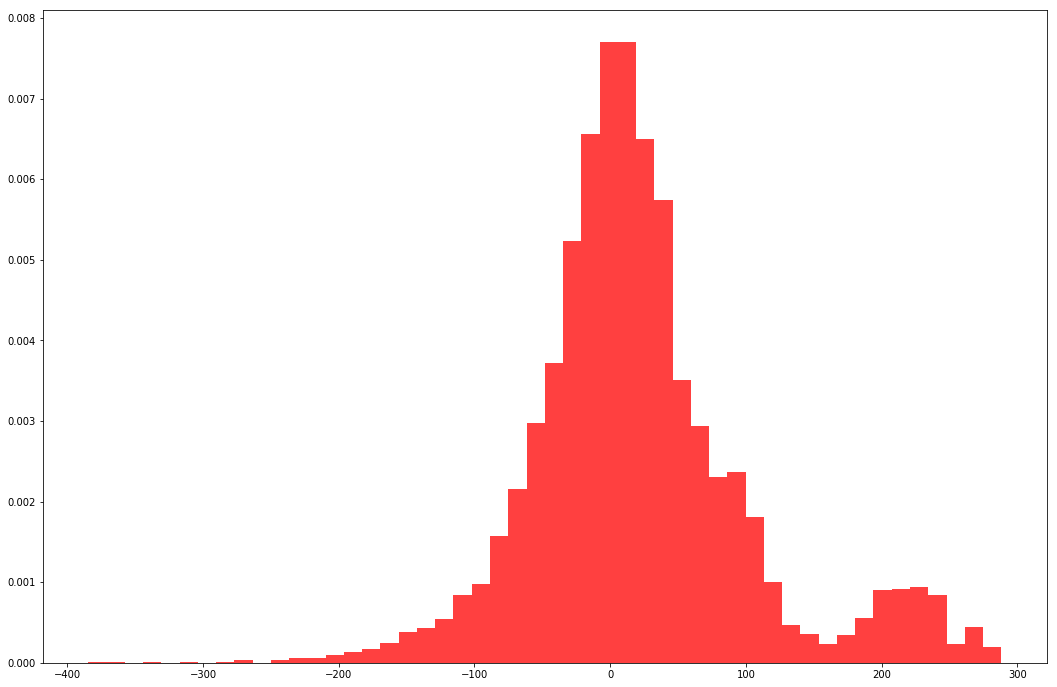

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_true_positive_scores, 50, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


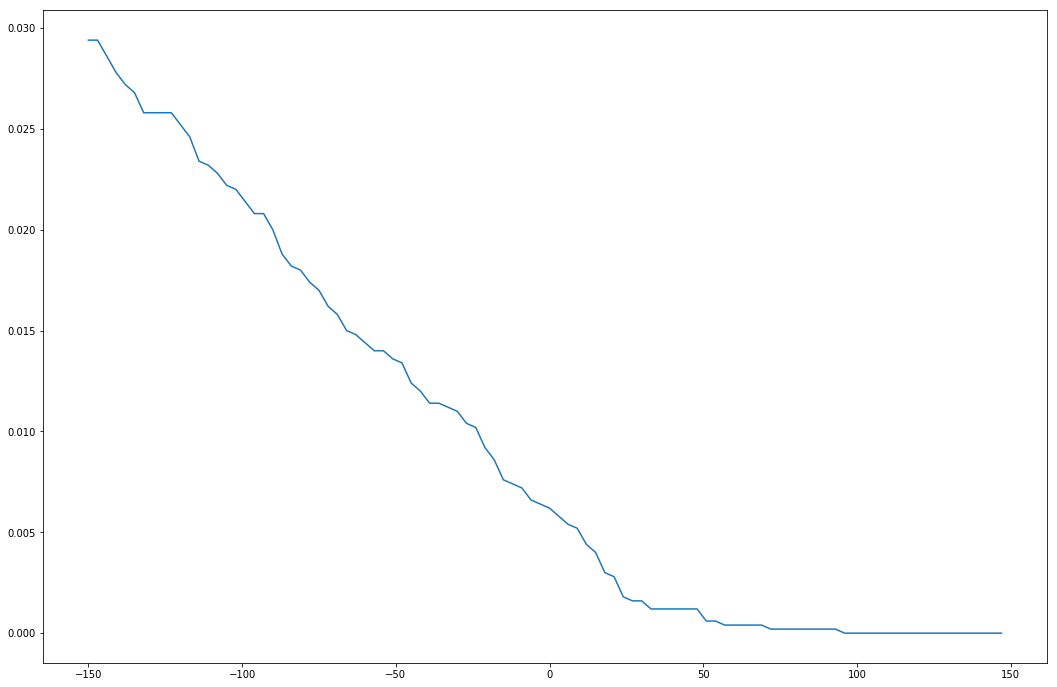

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -150.0
max_log_proba_threshold = 150.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    test_validation_false_positive_rate1 = float(sum(1 for score in validation_false_positive_scores if score >= test_log_proba_threshold)) / float(validation_set.images.shape[0])
    X.append(test_log_proba_threshold)
    Y.append(test_validation_false_positive_rate1)
    

plt.plot(X, Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


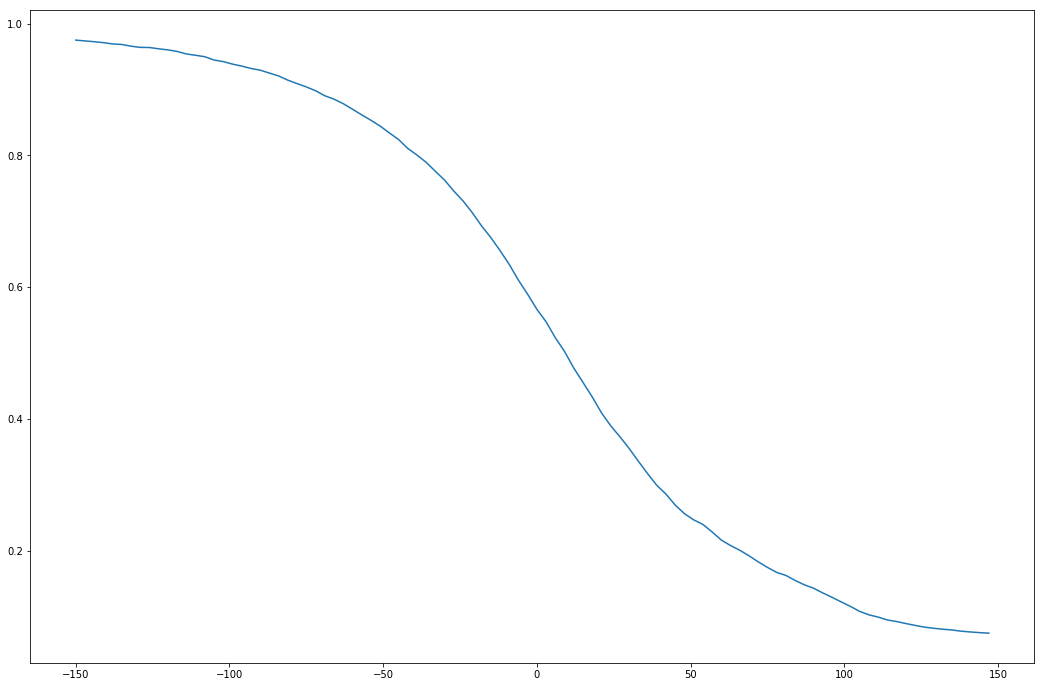

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -150.0
max_log_proba_threshold = 150.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < test_log_proba_threshold)
    n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1
    
    n_classified_ratio = float(n_classified_validation_images1) / float(n_unclassified_validation_images1 + n_classified_validation_images1)
    
    X.append(test_log_proba_threshold)
    Y.append(n_classified_ratio)
    

plt.plot(X, Y)
plt.show()

In [19]:
log_proba_threshold = 50.0

def GMM_layer(image):
    image_pca = pca1.transform(image.reshape(1, -1))
    scores = []
    for i in range(0, 10):
        scores.append(gaussian_mixtures[i].score_samples(image_pca)[0])
    max_score = max(scores)
    predicted_class = scores.index(max_score)
    if max_score >= log_proba_threshold:
        return [True, predicted_class, max_score]
    return [False, predicted_class, max_score]

In [20]:
validation_false_positive_rate1 = float(sum(1 for score in validation_false_positive_scores if score >= log_proba_threshold)) / float(validation_set.images.shape[0])
n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < test_log_proba_threshold)
n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1
n_classified_ratio = float(n_classified_validation_images1) / float(n_unclassified_validation_images1 + n_classified_validation_images1)

In [21]:
print(validation_false_positive_rate1)

0.0006


In [22]:
print(n_classified_ratio)

0.0746


In [23]:
n_unclassified_train_images1 = sum(1 for label, prediction, log_proba in train_labels_predictions_log_probas if log_proba < log_proba_threshold)
n_classified_train_images1 = train_set.images.shape[0] - n_unclassified_train_images1

n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < log_proba_threshold)
n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1

In [24]:
print(n_unclassified_train_images1)

36703


In [25]:
print(n_classified_train_images1)

18297


In [26]:
print(n_unclassified_validation_images1)

3755


In [27]:
print(n_classified_validation_images1)

1245


In [28]:
unclassified_train_set_images1 = np.zeros((n_unclassified_train_images1, 784))
unclassified_train_set_labels = []
unclassified_train_indexes1 = []
unclassified_train_index_map1 = []

k = 0
for i in range(0, train_set.images.shape[0]):
    if train_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_train_set_images1[k, :] = train_set.images[i, :]
        unclassified_train_set_labels.append(train_set.labels[i])
        unclassified_train_indexes1.append(i)
        unclassified_train_index_map1.append(k)
        k += 1
    else:
        unclassified_train_index_map1.append(-1)
        
        
unclassified_validation_set_images1 = np.zeros((n_unclassified_validation_images1, 784))
unclassified_validation_set_labels = []
unclassified_validation_indexes1 = []
unclassified_validation_index_map1 = []

k = 0
for i in range(0, validation_set.images.shape[0]):
    if validation_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_validation_set_images1[k, :] = validation_set.images[i, :]
        unclassified_validation_set_labels.append(validation_set.labels[i])
        unclassified_validation_indexes1.append(i)
        unclassified_validation_index_map1.append(k)
        k += 1
    else:
        unclassified_validation_index_map1.append(-1)

In [29]:
pca2 = PCA(n_components=100)
pca2.fit(unclassified_train_set_images1)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
train_images_pca2 = pca2.transform(unclassified_train_set_images1)
validation_images_pca2 = pca2.transform(unclassified_validation_set_images1)

In [31]:
random_forest = RandomForestClassifier(n_estimators=40)
random_forest = random_forest.fit(train_images_pca2, unclassified_train_set_labels)

In [32]:
train_scores = random_forest.predict_proba(train_images_pca2)
validation_scores = random_forest.predict_proba(validation_images_pca2)

In [33]:
train_labels_predictions_probas = []
for i in range(0, train_images_pca2.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[i][j])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_probas.append([unclassified_train_set_labels[i], predicted_class, max(scores)])
    
    
validation_labels_predictions_probas = []
for i in range(0, validation_images_pca2.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(validation_scores[i][j])
    predicted_class = scores.index(max(scores))
    validation_labels_predictions_probas.append([unclassified_validation_set_labels[i], predicted_class, max(scores)])

In [34]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, proba in train_labels_predictions_probas:
    if label != prediction:
        train_false_positive_scores.append(proba)
    else:
        train_true_positive_scores.append(proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)


validation_false_positive_scores = []
validation_true_positive_scores = []
for label, prediction, proba in validation_labels_predictions_probas:
    if label != prediction:
        validation_false_positive_scores.append(proba)
    else:
        validation_true_positive_scores.append(proba)
validation_false_positive_scores = sorted(validation_false_positive_scores)
validation_true_positive_scores = sorted(validation_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


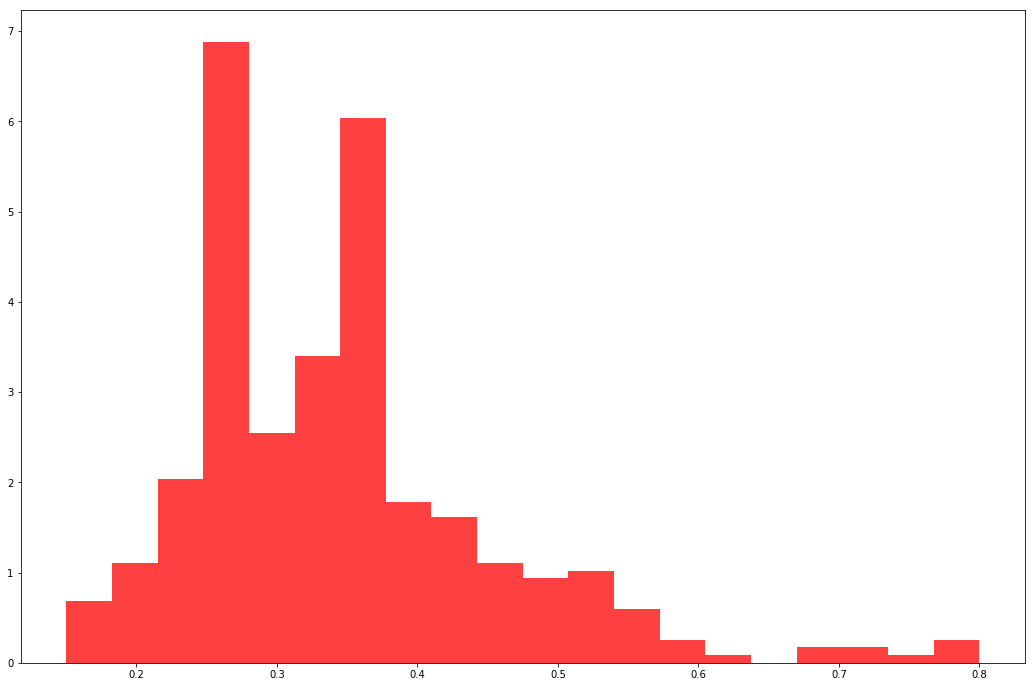

In [35]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_false_positive_scores, 20, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


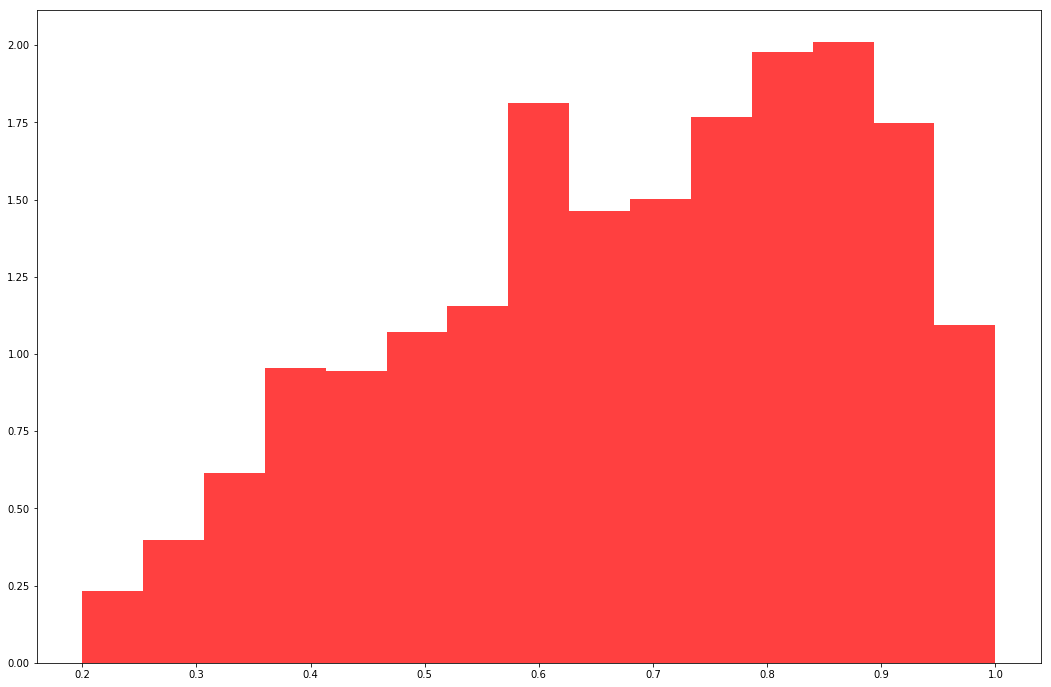

In [36]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_true_positive_scores, 15, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


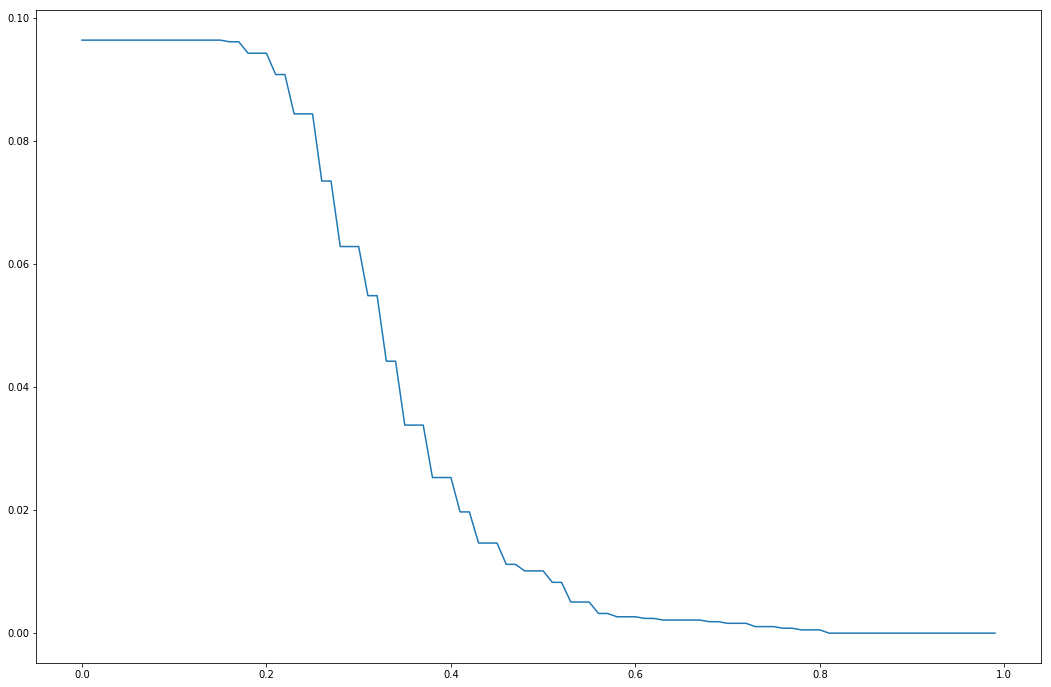

In [37]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_proba_threshold = 0.0
max_proba_threshold = 1.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_proba_threshold = min_proba_threshold + float(i)*(float(max_proba_threshold - min_proba_threshold)/float(n_tests))
    test_validation_false_positive_rate2 = float(sum(1 for score in validation_false_positive_scores if score >= test_proba_threshold)) / float(validation_images_pca2.shape[0])
    X.append(test_proba_threshold)
    Y.append(test_validation_false_positive_rate2)
    

plt.plot(X, Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


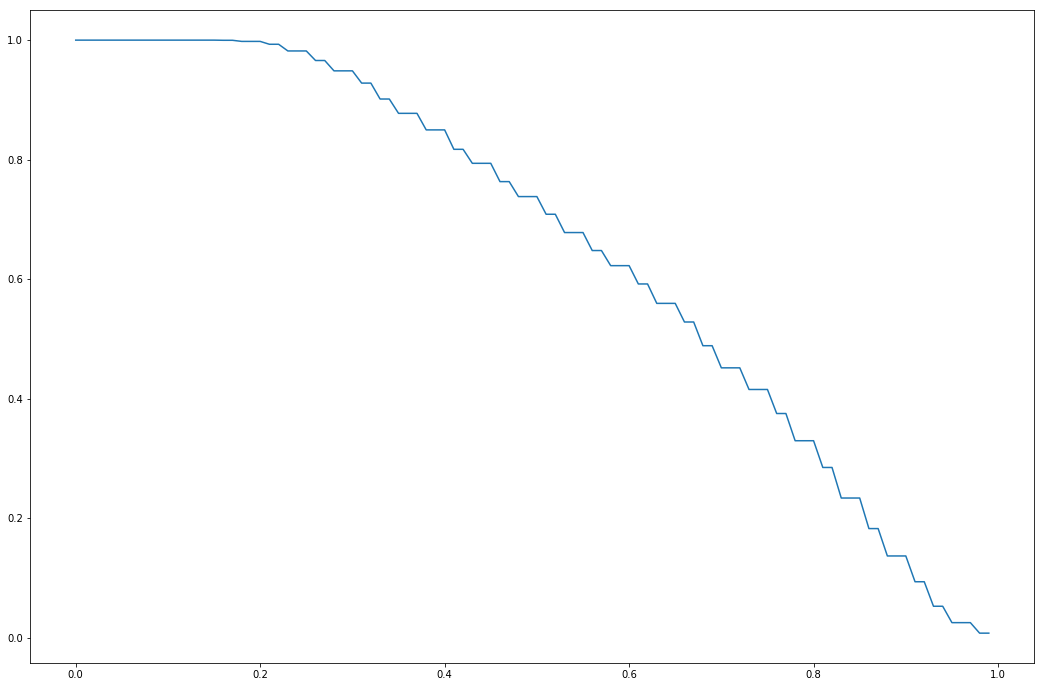

In [38]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_proba_threshold = 0.0
max_proba_threshold = 1.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_proba_threshold = min_proba_threshold + float(i)*(float(max_proba_threshold - min_proba_threshold)/float(n_tests))
    n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < test_proba_threshold)
    n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2
    
    n_classified_ratio = float(n_classified_validation_images2) / float(n_unclassified_validation_images2 + n_classified_validation_images2)
    
    X.append(test_proba_threshold)
    Y.append(n_classified_ratio)
    

plt.plot(X, Y)
plt.show()

In [39]:
proba_threshold = 0.7

def DecisionTree_layer(image):
    image_pca = pca2.transform(image.reshape(1, -1))
    scores = random_forest.predict_proba(image_pca)[0].tolist()
    max_score = max(scores)
    predicted_class = scores.index(max_score)
    if max_score >= proba_threshold:
        return [True, predicted_class, max_score]
    return [False, predicted_class, max_score]

In [40]:
validation_false_positive_rate2 = float(sum(1 for score in validation_false_positive_scores if score >= proba_threshold)) / float(validation_images_pca2.shape[0])

n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < proba_threshold)
n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2
n_classified_ratio = float(n_classified_validation_images2) / float(n_unclassified_validation_images2 + n_classified_validation_images2)

In [41]:
print(validation_false_positive_rate2)

0.0018641810918774966


In [42]:
print(n_classified_ratio)

0.48868175765645805


In [43]:
n_unclassified_train_images2 = sum(1 for label, prediction, proba in train_labels_predictions_probas if proba < proba_threshold)
n_classified_train_images2 = train_images_pca2.shape[0] - n_unclassified_train_images2

n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < proba_threshold)
n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2

In [44]:
print(n_unclassified_train_images2)

1874


In [45]:
print(n_classified_train_images2)

34829


In [46]:
print(n_unclassified_validation_images2)

1920


In [47]:
print(n_classified_validation_images2)

1835


In [48]:
unclassified_train_set_images2 = np.zeros((n_unclassified_train_images2, 784))
unclassified_train_set_labels = []
unclassified_train_indexes2 = []
unclassified_train_index_map2 = []

k = 0
for i in range(0, train_set.images.shape[0]):
    if i in unclassified_train_indexes1:
        if train_labels_predictions_probas[unclassified_train_index_map1[i]][2] < proba_threshold:
            unclassified_train_set_images2[k, :] = train_set.images[i, :]
            unclassified_train_set_labels.append(train_set.labels[i])
            unclassified_train_indexes2.append(i)
            unclassified_train_index_map2.append(k)
            k += 1
        else:
            unclassified_train_index_map2.append(-1)
    else:
        unclassified_train_index_map2.append(-1)
total_n_unclassified_train_images = k
        
    
unclassified_validation_set_images2 = np.zeros((n_unclassified_validation_images2, 784))
unclassified_validation_set_labels = []
unclassified_validation_indexes2 = []
unclassified_validation_index_map2 = []

k = 0
for i in range(0, validation_set.images.shape[0]):
    if i in unclassified_validation_indexes1:
        if validation_labels_predictions_probas[unclassified_validation_index_map1[i]][2] < proba_threshold:
            unclassified_validation_set_images2[k, :] = validation_set.images[i, :]
            unclassified_validation_set_labels.append(validation_set.labels[i])
            unclassified_validation_indexes2.append(i)
            k += 1
        else:
            unclassified_validation_index_map2.append(-1)
    else:
        unclassified_validation_index_map2.append(-1)
total_n_unclassified_validation_images = k

In [49]:
pca3 = PCA(n_components=100)
pca3.fit(unclassified_train_set_images2)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
train_images_pca3 = pca3.transform(unclassified_train_set_images2)
validation_images_pca3 = pca3.transform(unclassified_validation_set_images2)

In [51]:
print(total_n_unclassified_train_images)

1874


In [52]:
print(total_n_unclassified_validation_images)

1920


In [53]:
pca4 = PCA(n_components=2)
pca4.fit(unclassified_train_set_images2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
train_images_pca4 = pca4.transform(unclassified_train_set_images2)
validation_images_pca4 = pca4.transform(unclassified_validation_set_images2)

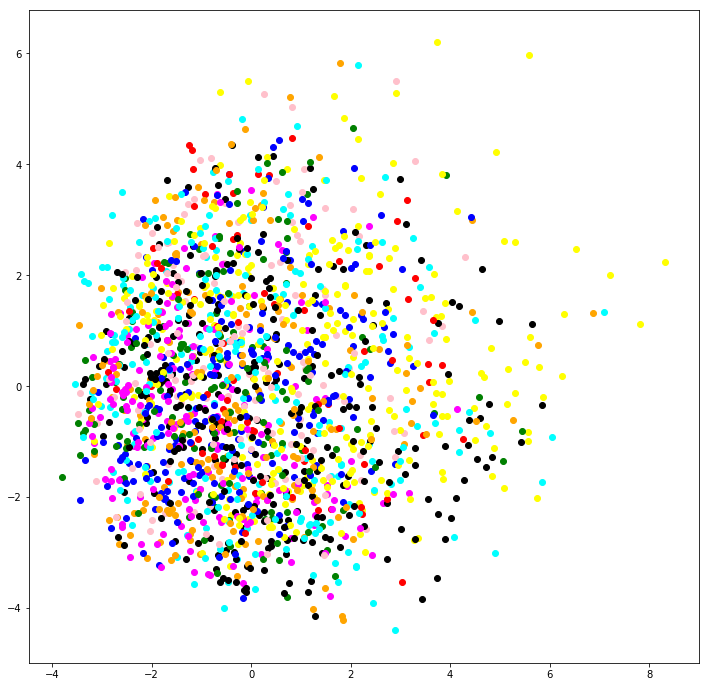

In [55]:
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, train_set.images.shape[0]):
    if i in unclassified_train_indexes2:
        k = unclassified_train_index_map2[i]
        plt.scatter(train_images_pca4[k][0], train_images_pca4[k][1], color=color_values[train_set.labels[i]])

plt.show()   

In [56]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [57]:

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [58]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [59]:
def get_mnist_batch(batch_size):
    
    '''
    indexes = np.random.choice(train_images_pca3.shape[0], batch_size)
    batch_x = np.zeros((batch_size, 100))
    batch_y = np.zeros((batch_size, 10))
    for i in range(0, batch_size):
        batch_x[i, :] = train_images_pca3[indexes[i], :]
        batch_y[i, unclassified_train_set_labels[indexes[i]]] = 1.0
    '''
    
    indexes = np.random.choice(train_set.images.shape[0], batch_size)
    batch_x = np.zeros((batch_size, 784))
    batch_y = np.zeros((batch_size, 10))
    for i in range(0, batch_size):
        batch_x[i, :] = train_set.images[indexes[i], :]
        batch_y[i, train_set.labels[indexes[i]]] = 1.0
    
    return batch_x, batch_y

In [60]:
def labels_to_one_hot(labels):
    ret = np.zeros((len(labels), 10))
    for i in range(0, len(labels)):
        ret[i, labels[i]] = 1.0
    return ret

In [61]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = get_mnist_batch(batch_size)
            #batch_x, batch_y = mnist.train.next_batch(batch_size)
            #print(batch_y[0])
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: unclassified_validation_set_images2, y: labels_to_one_hot(unclassified_validation_set_labels)}))

Epoch: 0001 cost= 157.523719208
Epoch: 0002 cost= 38.001214043
Epoch: 0003 cost= 23.137930520
Epoch: 0004 cost= 16.936569855
Epoch: 0005 cost= 12.018801439
Epoch: 0006 cost= 9.303927720
Epoch: 0007 cost= 6.503854946
Epoch: 0008 cost= 5.347187337
Epoch: 0009 cost= 4.005216238
Epoch: 0010 cost= 3.220319351
Epoch: 0011 cost= 2.351638339
Epoch: 0012 cost= 1.818343328
Epoch: 0013 cost= 1.349561053
Epoch: 0014 cost= 1.397128932
Epoch: 0015 cost= 1.043829859
Optimization Finished!
Accuracy: 0.888021


In [62]:
# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [63]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [64]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

In [89]:
losses = []
accuracies = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        #batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x, batch_y = get_mnist_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
            losses.append(loss)
            accuracies.append(acc)
        step += 1
    print("Optimization Finished!")
    print("Accuracy:", accuracy.eval({x: unclassified_validation_set_images2,
                                      y: labels_to_one_hot(unclassified_validation_set_labels),
                                      keep_prob: 1.}))
    predictions = pred.eval({x: test_set.images,
                                      keep_prob: 1.})

Iter 1280, Minibatch Loss= 26650.779297, Training Accuracy= 0.21875
Iter 2560, Minibatch Loss= 10150.923828, Training Accuracy= 0.42188
Iter 3840, Minibatch Loss= 8353.493164, Training Accuracy= 0.58594
Iter 5120, Minibatch Loss= 6558.556641, Training Accuracy= 0.67969
Iter 6400, Minibatch Loss= 4442.170898, Training Accuracy= 0.71094
Iter 7680, Minibatch Loss= 2753.019531, Training Accuracy= 0.83594
Iter 8960, Minibatch Loss= 1729.170532, Training Accuracy= 0.89062
Iter 10240, Minibatch Loss= 2295.300781, Training Accuracy= 0.85156
Iter 11520, Minibatch Loss= 1433.195557, Training Accuracy= 0.90625
Iter 12800, Minibatch Loss= 3643.830322, Training Accuracy= 0.81250
Iter 14080, Minibatch Loss= 1266.397705, Training Accuracy= 0.89844
Iter 15360, Minibatch Loss= 2482.707031, Training Accuracy= 0.90625
Iter 16640, Minibatch Loss= 505.600403, Training Accuracy= 0.92969
Iter 17920, Minibatch Loss= 2211.198975, Training Accuracy= 0.88281
Iter 19200, Minibatch Loss= 1685.039062, Training Accu

In [90]:
print(predictions)

[[-20657.39453125 -21907.265625    -2582.92993164 ...,  37041.6171875
  -22688.97070312 -10768.68554688]
 [  -940.51727295   6983.81982422  51178.26171875 ..., -28079.28125
   -1517.55383301 -37416.5703125 ]
 [-12985.86132812  24486.61132812  -6592.61962891 ...,  -1820.19714355
   -4691.05224609  -9321.69628906]
 ..., 
 [-23974.8046875   -8882.96289062 -20947.79296875 ...,   5331.11914062
    2993.96582031   7334.46289062]
 [-15874.328125   -15804.46972656 -32366.73242188 ..., -23877.34179688
    5364.03808594  -9412.80175781]
 [  3862.17480469 -27883.12304688  12061.73339844 ..., -22846.49609375
   -1554.60449219 -14755.32617188]]


In [91]:
cnn_predictions = predictions

In [105]:
def ensemble(test_image_index):
    test_image = test_set.images[test_image_index]
    prediction, predicted_class, score = GMM_layer(test_image)
    if prediction:
        return predicted_class
    prediction, predicted_class, score = DecisionTree_layer(test_image)
    if prediction:
        return predicted_class
    pred_list = cnn_predictions[test_image_index].tolist()
    return pred_list.index(max(pred_list))

In [106]:
labels_predictions = []
for i in range(0, test_set.images.shape[0]):
    prediction = ensemble(i)
    label = test_set.labels[i]
    labels_predictions.append([label, prediction])

In [107]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [108]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [109]:
confusion_matrix = get_confusion_matrix(10, labels_predictions)

In [110]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  966.     0.     2.     1.     0.     1.     3.     3.     2.     2.]
 [    0.  1118.     6.     1.     1.     0.     5.     0.     4.     0.]
 [    2.     0.  1007.     2.     2.     0.     1.     5.    13.     0.]
 [    0.     0.     3.   997.     0.     1.     0.     4.     3.     2.]
 [    0.     0.     1.     1.   964.     0.     3.     0.     2.    11.]
 [    1.     0.     0.    19.     1.   866.     2.     0.     2.     1.]
 [    4.     3.     0.     0.     3.     4.   939.     0.     4.     1.]
 [    0.     6.    20.    11.     5.     0.     0.   972.     1.    13.]
 [    3.     0.     5.    11.     7.     3.     4.     2.   935.     4.]
 [    3.     1.     0.     7.    16.     3.     0.     7.     6.   966.]]


In [112]:
error_ratio = get_error_ratio(labels_predictions)

In [113]:
print(error_ratio)

0.027
